A comprehensive guide on Support Vector Machines (SVM)


- What are Support Vector Machines (SVM)
- Hyperplanes 
- Marginal Distance 
- Linear Separable vs Non-Linear Separable 
- SVM Kernels
- Code implementation

### What are Support Vector Machines (SVM)

A supervised machine learning algorithm used to solve regression and classification problems (more commonly used for classification) 


### Hyperplanes 

- This is a dividing line (decision boundary) that separates the clusters of data. 
- Given the diagram below, where the solid red line is the hyperplane separating the 2 classes

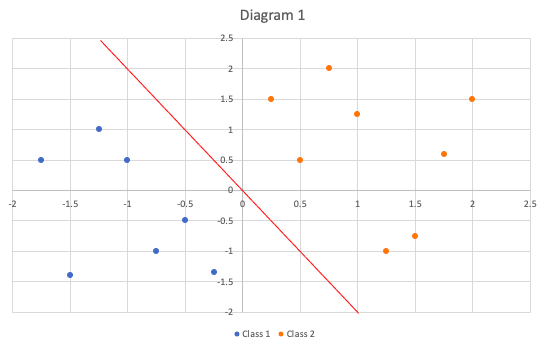

- We know that the equation of the hyperplane is:
    - $w^Tx+b=0$
- We also know the equation of the straight line:
    - $y=mx+b$
    - We assume the slope, m = -1 and b = 0
    - This gives us $y = mx+0$
    - Written in terms of $w$, we have:
        - $y=w^Tx+0$
        - Let us take the point (-0.5,0) as an example
$y = \begin{bmatrix} -1 \\ 0 \end{bmatrix}\begin{bmatrix} -0.5  & 0 \end{bmatrix}$
        - $y = 0.5$
    - We notice that for any point that we choose below the hyperplane we will always get a positive value
    - If we chose a point above the hyperplane, it will yield a result that is always negative
    - This helps us distinguish between classes for classification problems



#### Marginal Distance 
- What makes SVM differ from other models (i.e logistic regression) is the presence of marginal lines/planes 
- To maximize the distance between the 2 classes, 2 marginal lines are created on each side of the hyperplane (usually represented as dotted lines). Each marginal line will pass through the nearest data point **(these points are known as support vectors)** on each side.

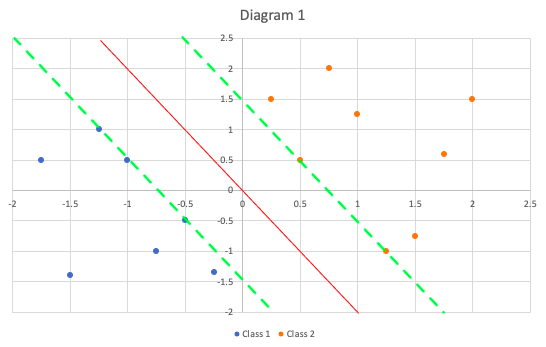

- The distance between the marginal line and hyperplane is known as the marginal distance
- We want a hyperplane that gives us the largest marginal distance because it makes our model **more generalizable**.

- The equation for the 2 marginal lines can be written as
    - $w^Tx_1+b=-1$                $(1)$
    - $w^Tx_2+b=1$                 $(2)$
    - where:
        - $x_1$: distance from hyperplane to the marginal line on the right
        - $x_2$: distance from the hyperplane to left marginal line
- Computing distance between 2 marginal lines:
    - We take equations (1) and (2) of the 2 marginal lines and simplify it to:
    - $w^T(x_2-x_1) = 2$
    - To eliminate the term $w^T$ we divide both sides of the equation with the norm of w, $||w||$
    - $\cfrac{w^T(x_2-x_1)}{||w||} =\cfrac{2}{||w||}$
    - Therefore the equation we want in order to maximize the marginal distance is:<br>
$argmax(w^*,b^*)\cfrac{2}{||w||}$ <br>
Such that
            
  $y_i = \begin{cases} +1\space &\text{; } w^Tx+b\ge 1 \\ -1 &\text{; } w^Tx+b\le-1\end{cases}$

#### Soft Margin 
- What we have derived above is known as a **Hard Margin**
- It is often the case where we have datasets that are not perfectly separable by a linear line.
- To resolve this issue, we modify the equation to allow for a few misclassifications.
    
$argmin(w^*,b^*)\cfrac{||w||}{2}+c\sum^n_{i=1}\zeta_i$
    
where:
    
c : How many errors the model will allow. This is also the regularization parameter 
    
$\zeta$  : Value of the error

- Take the diagram below for example
- We notice that that some points are misclassified (The 2 orange points to the left of the hyperplane)

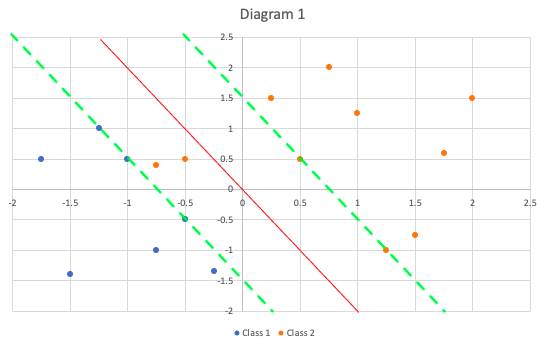

- Using the soft margin formula, we are able to still maintain the original position of the hyperplane because we take these misclassified points into account.
- Using soft margin vs hard margin prevents us from overfitting the model.

### Linear Separable vs Non-Linear Separable 

- Linear Separable:
    - This is when your data can be easily separated by a linear line (just like the example above)
- Non Linear Separable:
    - Not all our data will be easily separable like the example above.  
    - Take the diagram below for example. There isn’t a hyperplane that can perfectly separate the 2 classes

    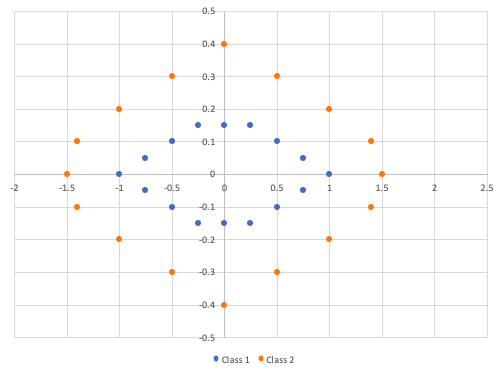

    - This is resolved by using SVM kernels. This is where we transform a low dimensional space to a higher dimensional space (i.e 2D space to 3D space).
    - Once converted, we are able to create a hyperplane that easily separates the 2 classes. 
    - Below is an instance where data in 1D is now separable when converted to a 2D space 


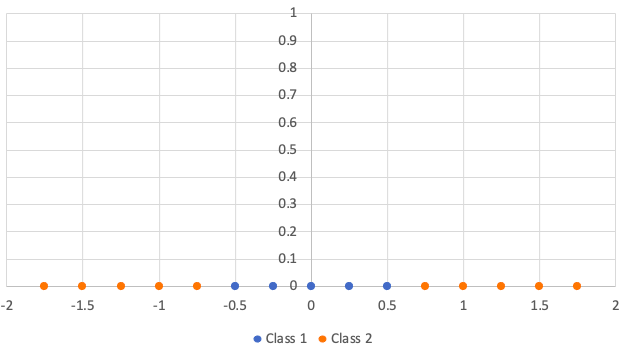

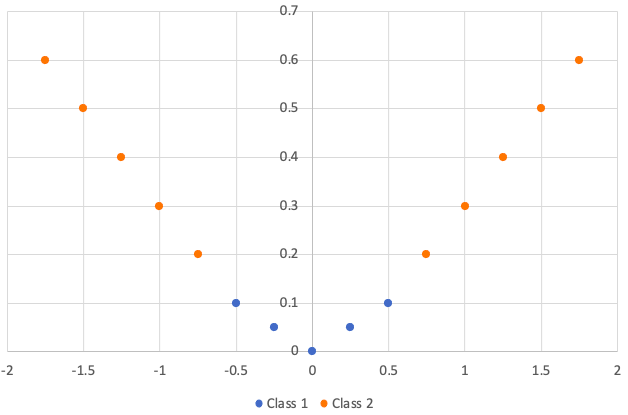



### SVM kernels 

Kernels are chosen through hyperparameter tuning. Below are brief descriptions of commonly used kernels for SVM. 

- __Polynomial Kernels__ <br>


A polynomial kernel is defined as: <br>
$f(x_1,x_2) = (x_1^T \cdot x_2+1)^d$


By calculating the matrix $x_1^T \cdot x_2$ we get: 
$x_1^T \cdot x_2 = \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} \cdot \begin{bmatrix} x_1 & x_2 \end{bmatrix}$


$x_1^T \cdot x_2 = \begin{bmatrix} x_1^2 & x_1x_2 \\ x_1x_2 & x_2^2 \end{bmatrix}$


This shows us that from 2 dimensions ($x_1 $ and $x_2$) we can now get 5 dimensions by finding $x_1^2$ , $x_2^2$ and $x_1x_2$


- __Radial basis function (RBF) Kernels__ <br>

RBF kernels are defined as:  

$f(x_1,x_2) = e^{\cfrac{-(||x_1-x_2||^2)}{2 \sigma^2}} $

where, <br>
$ ||x_1-x_2||^2 $ is the squared Euclidean distance <br>
$ \sigma $ is the variance 

- __Sigmoid Kernel__ <br>

The sigmoid kernel maps the input to either 0 or 1. It is also known as a hyperbolic tangent or multilayer perceptron. 

The sigmoid kernel is defined as: <br>
$ f(x_1,x_2) = tanh(\gamma x^Ty+c)  $

where, <br>
$ \gamma $ is the slope <br>
$ c $ is the intercept






### Implementing SVM using Python's sckit-learn 

We explore a classification problem using SVM. We create our own dataset using sklearn's "make_classification". 

Then we proceed to create the SVM model. 

With the model created we can now create the hyperplanes (solid red line) and marginal lines (dotted blue) for the hyperplanes. The hyperplane created will be the most optimal/generalizable since it will have the largest possible margin. 

Finally, we evaluate our model by using sklearn's classification report and confusion matrix

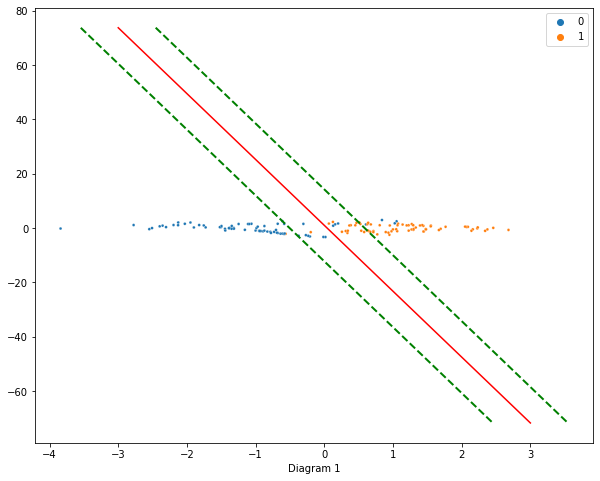

In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Creating a dataset of 200 points and 2 features (binary classification). 
# Note that the n_redundant=2 by default. We set this value to 0. 
# Number of informative, redundant and repeated features must sum to less than the number of total features
X, y = make_classification(n_samples=200, 
                           n_features=2,
                           n_redundant=0,
                           random_state=2)

# Separating the dataset with train_test_split. Stratify is used to balance splitting the classes 
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                   test_size=0.3, stratify=y,
                                   random_state=2)

# Training the model with SVC (support vector classification)
model = SVC(kernel='linear', random_state=2)
model.fit(X_train, y_train)

# Building the hyperplane
w = model.coef_[0]           
b = model.intercept_[0]      
x_points = np.linspace(-3, 3)    
y_points = -(w[0] / w[1]) * x_points - b / w[1]  


# Plotting the marginal lines 
# Calculating unit vector for normal vector w
w_hat = model.coef_[0] / (np.sqrt(np.sum(model.coef_[0] ** 2)))

# Calculating margin
margin = 1/np.sqrt(np.sum(model.coef_[0]**2))

# Finding marginal lines 
hyperplane_points = np.array(list(zip(x_points, y_points))) 

new_points_above = hyperplane_points + w_hat * margin
new_points_below = hyperplane_points - w_hat * margin


plt.figure(figsize=(10, 8))
# Plotting the scatter plot 
sns.scatterplot(x=X_train[:,0], 
                y=X_train[:,1], 
                hue=y_train, 
                s=8);

# Plotting the hyperplane
plt.xlabel("Diagram 1")
plt.plot(x_points, y_points, c='r');


plt.plot(new_points_above[:, 0], 
         new_points_above[:, 1], 
         'g--', 
         linewidth=2)

plt.plot(new_points_below[:, 0], 
         new_points_below[:, 1], 
         'g--',
         linewidth=2)

In [15]:
# Evaluating the model 
from sklearn.metrics import classification_report, confusion_matrix

predictions = model.predict(X_test)

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))


[[29  1]
 [ 0 30]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        30
           1       0.97      1.00      0.98        30

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60

